In [1]:
from lib import *

In [4]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3=t1 *8;
t4=t1 -4;
t5=t1 /2;
t6=t2 * t3;
t7=t4-t5;
t8=t6 * t7;
t9=t5 * t2;
t10= ^ t9;
STORE(y , t8 );
STORE(z , t10 );"""


In [ ]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3= t1 * 8;
t4=t3 /t2;
STORE(y , t4 );"""

In [3]:
sample = """
t1=LOAD(x);
t2=LOAD(x);
t2=LOAD(x);
t1=t1 + t2;
t1=t1 + t2;
t3=t1+t2;
t3=t1+t2;
t3=t1+t2;
STORE(y , t3 );
STORE(y , t3 );
STORE(y , t3 );   
"""

In [12]:
sample = """
t1=LOAD(x);
t1=9;
t1=^t1;
t1= ^t1;
STORE(y , t1 );
STORE(y , t1 );"""


In [10]:
sample = """
t1=LOAD(x);
t2=LOAD(y);
t3=t2/8;
t4=t1*t1;
t4=^t4;
t3 = t4+t3;
STORE(y , t3 );
STORE(z , t4 );
"""

[['t1', '=', 'LOAD', '(', 'x', ')'], ['t2', '=', 'LOAD', '(', 'y', ')'], ['t3', '=', 't2', '/', '8'], ['t4', '=', 't1', '*', 't1'], ['t4', '=', '^', 't4'], ['t3', '=', 't4', '+', 't3'], ['STORE', '(', 'y', ',', 't3', ')'], ['STORE', '(', 'z', ',', 't4', ')']]
[('LOAD', 't1', 'x', ()),
 ('LOAD', 't2', 'y', ()),
 ('DIV', 't3', 't2', '8', (1,)),
 ('MUL', 't4', 't1', 't1', (0,)),
 ('SQRT', 't4', 't4', (3,)),
 ('ADD', 't3', 't4', 't3', (2, 4)),
 ('STORE', 'y', 't3', (5,)),
 ('STORE', 'z', 't4', (4,))]
[('LOAD', 't1', 'x'), ('LOAD', 't2', 'y'), ('DIV', 't3', 't2', '8'), ('MUL', 't4', 't1', 't1'), ('SQRT', 't4', 't4'), ('ADD', 't3', 't4', 't3'), ('STORE', 'y', 't3'), ('STORE', 'z', 't4')]
Final IR
[('LOAD', 't1', 'x', ()),
 ('LOAD', 't2', 'y', ()),
 ('DIV', 't3', 't2', '8', (1,)),
 ('MUL', 't4', 't1', 't1', (0,)),
 ('SQRT', 't4', 't4', (3,)),
 ('ADD', 't3', 't4', 't3', (2, 4)),
 ('STORE', 'y', 't3', (5,)),
 ('STORE', 'z', 't4', (4,))]
ind ['t1', 't2', 't3', 't4', 't4', 't3', 'y', 'z']
dep [[]

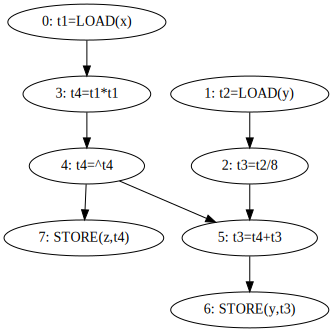

In [11]:

parse_instance = Parser()
IR,depend,indep,line_depend= parse_instance.parse(sample)
print('Final IR')
pprint(IR)
print("ind",indep)
print("dep",depend)
print("line:",line_depend)

parse_instance.dot
        

In [12]:
multi_core_count = 2   

multi_code_gen_instance = CodeGen(multi_core_count,path="multi_core_code/")
single_code_gen_instance = CodeGen(1,path="single_core_code/")


single_code_gen_instance.generate_compiled_code(IR)
multi_code_gen_instance.generate_compiled_code(IR)

Iteration: 0	 Initial Imbalance: 0
Iteration: 1	 New Imbalance: 0, Current Imbalance: 0
Stopping with an Current Imbalance of 0
Iteration: 0	 Initial Imbalance: 13
Iteration: 1	 New Imbalance: 11, Current Imbalance: 13
Iteration: 2	 New Imbalance: 5, Current Imbalance: 11
Iteration: 3	 New Imbalance: 3, Current Imbalance: 5
Iteration: 4	 New Imbalance: 5, Current Imbalance: 3
Stopping with an Current Imbalance of 3


In [21]:
multi_instance = Simulator(multi_core_count,'multi_core_code/')
multi_instance.MEM['x']= 10
multi_instance.MEM['y']= 20
print(multi_instance.MEM)
multi_instance.run()
print(multi_instance.MEM)
    

{'x': 10, 'y': 20}
Cycle:1,	PE_0: LOAD, t2, y[1], 	PE_1: LOAD, t1, x[1], 
Cycle:2,	PE_0: NOP[1], 	PE_1: MUL, t4, t1, t1[4], 
Cycle:3,	PE_0: NOP[1], 	PE_1: MUL, t4, t1, t1[3], 
Cycle:4,	PE_0: NOP[1], 	PE_1: MUL, t4, t1, t1[2], 
Cycle:5,	PE_0: NOP[1], 	PE_1: MUL, t4, t1, t1[1], 
Cycle:6,	PE_0: SQRT, t4, t4[10], 	PE_1: DIV, t3, t2, 8[8], 
Cycle:7,	PE_0: SQRT, t4, t4[9], 	PE_1: DIV, t3, t2, 8[7], 
Cycle:8,	PE_0: SQRT, t4, t4[8], 	PE_1: DIV, t3, t2, 8[6], 
Cycle:9,	PE_0: SQRT, t4, t4[7], 	PE_1: DIV, t3, t2, 8[5], 
Cycle:10,	PE_0: SQRT, t4, t4[6], 	PE_1: DIV, t3, t2, 8[4], 
Cycle:11,	PE_0: SQRT, t4, t4[5], 	PE_1: DIV, t3, t2, 8[3], 
Cycle:12,	PE_0: SQRT, t4, t4[4], 	PE_1: DIV, t3, t2, 8[2], 
Cycle:13,	PE_0: SQRT, t4, t4[3], 	PE_1: DIV, t3, t2, 8[1], 
Cycle:14,	PE_0: SQRT, t4, t4[2], 	PE_1: NOP[1], 
Cycle:15,	PE_0: SQRT, t4, t4[1], 	PE_1: NOP[1], 
Cycle:16,	PE_0: NOP[1], 	PE_1: ADD, t3, t4, t3[1], 
Cycle:17,	PE_0: STORE, y, t3[1], 	PE_1: STORE, z, t4[1], 
{'x': 10, 'y': 12.5, 'z': 10.0}


In [22]:
seq_instance = Simulator(1,'single_core_code/')
seq_instance.MEM['x']= 10
seq_instance.MEM['y']= 20
print(seq_instance.MEM)
seq_instance.run()
print(seq_instance.MEM)

{'x': 10, 'y': 20}
Cycle:1,	PE_0: LOAD, t1, x[1], 
Cycle:2,	PE_0: LOAD, t2, y[1], 
Cycle:3,	PE_0: DIV, t3, t2, 8[8], 
Cycle:4,	PE_0: DIV, t3, t2, 8[7], 
Cycle:5,	PE_0: DIV, t3, t2, 8[6], 
Cycle:6,	PE_0: DIV, t3, t2, 8[5], 
Cycle:7,	PE_0: DIV, t3, t2, 8[4], 
Cycle:8,	PE_0: DIV, t3, t2, 8[3], 
Cycle:9,	PE_0: DIV, t3, t2, 8[2], 
Cycle:10,	PE_0: DIV, t3, t2, 8[1], 
Cycle:11,	PE_0: MUL, t4, t1, t1[4], 
Cycle:12,	PE_0: MUL, t4, t1, t1[3], 
Cycle:13,	PE_0: MUL, t4, t1, t1[2], 
Cycle:14,	PE_0: MUL, t4, t1, t1[1], 
Cycle:15,	PE_0: SQRT, t4, t4[10], 
Cycle:16,	PE_0: SQRT, t4, t4[9], 
Cycle:17,	PE_0: SQRT, t4, t4[8], 
Cycle:18,	PE_0: SQRT, t4, t4[7], 
Cycle:19,	PE_0: SQRT, t4, t4[6], 
Cycle:20,	PE_0: SQRT, t4, t4[5], 
Cycle:21,	PE_0: SQRT, t4, t4[4], 
Cycle:22,	PE_0: SQRT, t4, t4[3], 
Cycle:23,	PE_0: SQRT, t4, t4[2], 
Cycle:24,	PE_0: SQRT, t4, t4[1], 
Cycle:25,	PE_0: ADD, t3, t4, t3[1], 
Cycle:26,	PE_0: STORE, y, t3[1], 
Cycle:27,	PE_0: STORE, z, t4[1], 
{'x': 10, 'y': 12.5, 'z': 10.0}


In [23]:
seq_instance.MEM == multi_instance.MEM

True